In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

# Hypothesis testing

In [2]:
# Let's create two groups of batting speed statistics 
wooden_bats = list(np.random.normal(91.4,7,100))
metal_bats = list(np.random.normal(94.6,8,100))
# These stats are from Crisco & Greenwald (2003)
# http://baseball.physics.illinois.edu/ComparativeBatStudy.pdf

## Preliminary: A little exploration

In [3]:
# What's the difference between these sample means?
94.6-91.4

3.1999999999999886

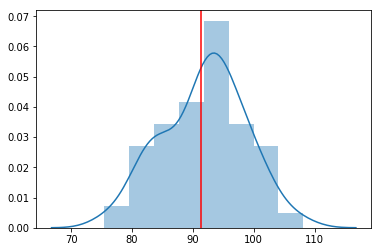

In [4]:
sns.distplot(wooden_bats, kde = True);
# plot a line at the mean
plt.axvline(x=91.4, color='red')
#plt.axvline(x=91.4-7, color='blue')
#plt.axvline(x=91.4+7, color='blue')

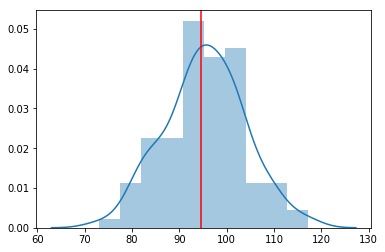

In [5]:
sns.distplot(metal_bats, kde = True);
# plot a line at the mean
plt.axvline(x=94.6, color='red')
#plt.axvline(x=94.6-8, color='blue')
#plt.axvline(x=94.6+8, color='blue')

In [6]:
# Calculate a margin of error at 99% confidence for the wooden bats
sample_mean = 91.4
z = 2.575
sigma = 7
n = 100

low_end = sample_mean - z * sigma / n ** 0.5
high_end = sample_mean + z * sigma / n ** 0.5
print(low_end)
print(high_end)

89.59750000000001
93.2025


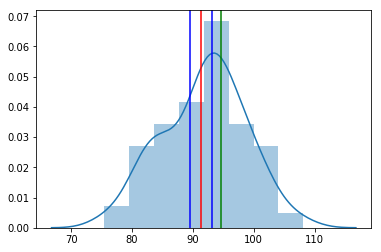

In [7]:
# Plot the metal mean onto the wooden confidence interval
sns.distplot(wooden_bats, kde = True);
# plot a line at the mean
plt.axvline(x=sample_mean, color='red')
plt.axvline(x=low_end, color='blue')
plt.axvline(x=high_end, color='blue')
plt.axvline(x=94.6, color='green')

In [8]:
# Calculate a margin of error at 99% confidence for the metal bats
sample_mean = 94.6
z = 2.575
sigma = 8
n = 100

low_end = sample_mean - z * sigma / n ** 0.5
high_end = sample_mean + z * sigma / n ** 0.5
print(low_end)
print(high_end)

92.53999999999999
96.66


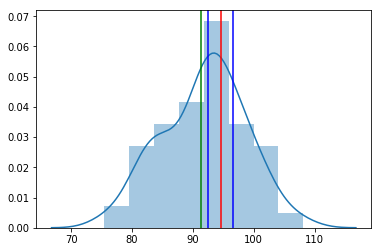

In [9]:
# Plot the metal mean onto the wooden confidence interval
sns.distplot(wooden_bats, kde = True);
# plot a line at the mean
plt.axvline(x=sample_mean, color='red')
plt.axvline(x=low_end, color='blue')
plt.axvline(x=high_end, color='blue')
plt.axvline(x=91.4, color='green')

## Calculate the estimate

In [10]:
# What's the average difference between the two sets of sample swings?
differences=np.subtract(metal_bats, wooden_bats)
x_bar = np.mean(differences)
sigma = np.std(differences)
print(x_bar)
print(sigma)

3.62794886001
11.6628439405


## Calculate the test statistic

Step 4: Calculate your test statistic. In this case, it's:

$$ z = \frac{\bar{x} - \mu_0}{\sigma/\sqrt{n}}$$

Note that $\mu_0$ is the mean we assume in our null hypothesis -- in this case, it's zero.

In [11]:
z = (x_bar - 0) / (sigma / (n ** 0.5))
print(z)

3.11068970699


In [12]:
# Let's calculate a normal distribution with a mean of zero and a std dev of one
normal = list(np.random.normal(0,1,1000))

[Text(0,0.5,'Percentage Distribution'),
 Text(0.5,0,'All possible sample means')]

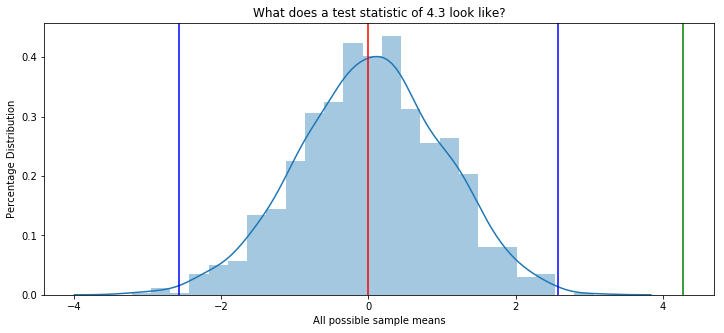

In [13]:
# Where does this test statistic fall on a normal distribution?
# Set figure size
fig = plt.figure(figsize=(12,5))

# get the axis
ax = fig.gca()
sns.distplot(normal, kde = True);
# plot lines at the standard devs
plt.axvline(x=0, color='red')
plt.axvline(x=2.575, color='blue')
plt.axvline(x=-2.575, color='blue')
plt.axvline(x=4.28, color='green')
# Set the labels
ax.set(title='What does a test statistic of 4.3 look like?')
ax.set(xlabel='All possible sample means', ylabel='Percentage Distribution')

## Check the p-value

In [14]:
import scipy.stats as stats
stats.ttest_1samp(differences, 0)

Ttest_1sampResult(statistic=3.0950971791957853, pvalue=0.0025584430021290661)